In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
tr_cols = train.columns.to_list()

In [65]:
toxic_classes = train[train[tr_cols].sum(axis=1)>0]
toxic_classes.iloc[:,2:]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,1,1,1,0,1,0
12,1,0,0,0,0,0
16,1,0,0,0,0,0
42,1,0,1,0,1,1
43,1,0,1,0,1,0
...,...,...,...,...,...,...
159494,1,0,1,0,1,1
159514,1,0,0,0,1,0
159541,1,0,1,0,1,0
159546,1,0,0,0,1,0


In [6]:
len(toxic_classes)

16225

In [7]:
train['comment_text'].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 

In [8]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,""" More I can't make any real suggestions on im...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [10]:
def clean_comment(comment):
    '''Lemmatizes, removes capitalization, punctuation and 'stopwords' from the lemmatized tokens,
    returns data in the dataframe for modeling in a "clean" state
    
    comment - a text string'''
    import nltk
    from nltk.corpus import stopwords
    import string
    #splitting sentences into tokens
    tokens = comment.split()
    

    
    #instantiating Lemmatizer and lemmatizing words
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    stopwords_list = stopwords.words('english')
    stopwords_list += ("''","``", "'s", "\\n\\n" , '...', 'i\\','\\n',
                   '•', "i", 'the', "'m", 'i\\', "'ve", "don\\'t",
                  "'re", "\\n\\ni", "it\\", "'ll", 'you\\', "'d", "n't",
                  '’', 'article', 'page', 'wikipedia', ' ',  "\\\'\\\'\\\'\\\'\\\'\\\'",
                  '\\n\\n-', "\''",'a','e', 'i', 'o','u', 'i\'m', 'i\'ll', 'what\'s', 
                      "i\'ve", "i\'d'" ) 

    #remove punctuation, capitalization, and stopwords
    stopwords_list += list(string.punctuation)
    stopped_tokens = [w.lower() for w in lemma_tokens if w.lower() not in stopwords_list]
    
    return ' '.join(stopped_tokens)
    

In [11]:
for text in train['comment_text']:
    clean_comment(text)

In [12]:
tr_classes = train.iloc[:,2:]

In [13]:
tr_cols = tr_classes.columns.to_list()
tr_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [14]:
y=train[tr_cols]

In [15]:
X = train['comment_text']

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
x=vectorizer.fit_transform(X)

In [108]:
tok_list = X.to_string()

In [109]:
from nltk import word_tokenize

tokens = word_tokenize(tok_list)

In [110]:
len(set(tokens))

257328

In [111]:
len(tokens)

1883555

In [16]:
val_counts = y.apply(pd.Series.value_counts)
val_counts

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,144277,157976,151122,159093,151694,158166
1,15294,1595,8449,478,7877,1405


In [17]:
tr_comment = train['comment_text']

In [23]:
import matplotlib.pyplot as plt

In [18]:
unlabelled_in_all = y[(y['toxic']!=1) & (y['severe_toxic']!=1) & (y['obscene']!=1) & 
                            (y['threat']!=1) & (y['insult']!=1) & (y['identity_hate']!=1)]
print('Percentage of unlabelled comments is ', round(len(unlabelled_in_all)/len(y)*100))

Percentage of unlabelled comments is  90


In [19]:
#Total rows in train
print('Total number of rows of dataset is {}'.format(len(X)))

Total number of rows of dataset is 159571


In [20]:
import seaborn as sns
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [21]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X))
#try texts_to_matrix
list_tokenized_train = tokenizer.texts_to_sequences(X)

In [100]:
list_tokenized_train.


    

AttributeError: 'list' object has no attribute 'distinct'

In [28]:
xo = tokenizer.fit_on_texts(X)

In [27]:
import nltk

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer=lambda x: x)
x = vectorizer.fit_transform(X)

In [24]:
yh = y['identity_hate']==1

In [25]:
import seaborn as sns

https://www.mathworks.com/help/textanalytics/ug/visualize-word-embedding-using-text-scatter-plot.html

ModuleNotFoundError: No module named 'fastTextWordEmbedding'

In [45]:
hate = train['identity_hate']

In [46]:
ha = pd.DataFrame(x)

In [47]:
train_cols = train[tr_cols]

In [48]:
hate = pd.concat([ha, train_cols], axis=1)

In [78]:
hate

,0,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"(0, 23)\t0.04616094327011781\n (0, 19)\t0.0...",0,0,0,0,0,0
1,"(0, 53)\t0.09031082685867212\n (0, 22)\t0.1...",0,0,0,0,0,0
2,"(0, 66)\t0.01875953336628439\n (0, 71)\t0.1...",0,0,0,0,0,0
3,"(0, 3)\t0.027467749277549778\n (0, 63)\t0.0...",0,0,0,0,0,0
4,"(0, 66)\t0.06418228584644614\n (0, 71)\t0.0...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,"(0, 13)\t0.029046129628944442\n (0, 2)\t0.1...",0,0,0,0,0,0
159567,"(0, 22)\t0.1191609193926197\n (0, 17)\t0.27...",0,0,0,0,0,0
159568,"(0, 90)\t0.13472461498867397\n (0, 51)\t0.0...",0,0,0,0,0,0
159569,"(0, 14)\t0.03267015249487218\n (0, 75)\t0.1...",0,0,0,0,0,0


In [49]:
hate.rename(columns={0:'textdata'}, inplace=True)

In [50]:
hate['textdata'][0]

<1x2325 sparse matrix of type '<class 'numpy.float64'>'
	with 48 stored elements in Compressed Sparse Row format>

In [90]:
max_features = 2000
tokenizer1 = Tokenizer(num_words=max_features)
tokenizer1.fit_on_texts(list(X))
#try texts_to_matrix
list_tokenized_train = tokenizer.texts_to_sequences(X)

In [92]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 400
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)

In [51]:
from sklearn.cluster import KMeans

NUMBER_OF_CLUSTERS = 6
km = KMeans(
    n_clusters=NUMBER_OF_CLUSTERS, 
    init='k-means++', 
    max_iter=500)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
from sklearn.decomposition import PCA

# First: for every class we get its corresponding cluster
clusters = km.predict(x)

# We train the PCA on the dense version of the tf-idf. 
pca = PCA(n_components=2)
two_dim = pca.fit_transform(x.todense())

scatter_x = two_dim[:, 0] # first principle component
scatter_y = two_dim[:, 1] # second principle component

In [78]:
x

<159571x2325 sparse matrix of type '<class 'numpy.float64'>'
	with 5337068 stored elements in Compressed Sparse Row format>

In [81]:
x.todense()

matrix([[0.59097488, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.53397883, 0.09826734, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.61664371, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.50264931, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.67642936, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.66599888, 0.        , 0.24624093, ..., 0.        , 0.        ,
         0.        ]])

In [90]:
scatter_x

array([-0.02751527,  0.26189304, -0.1109037 , ..., -0.00952854,
       -0.09294899, -0.03646624])

In [92]:
two_dim[:, 1]

array([-0.06201408, -0.02553069, -0.03523322, ..., -0.05348745,
       -0.02807771,  0.20639621])

ValueError: x and y must be the same size

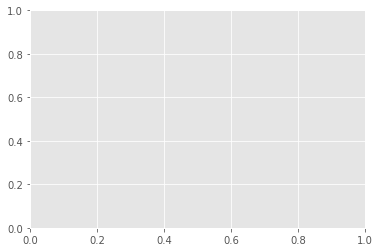

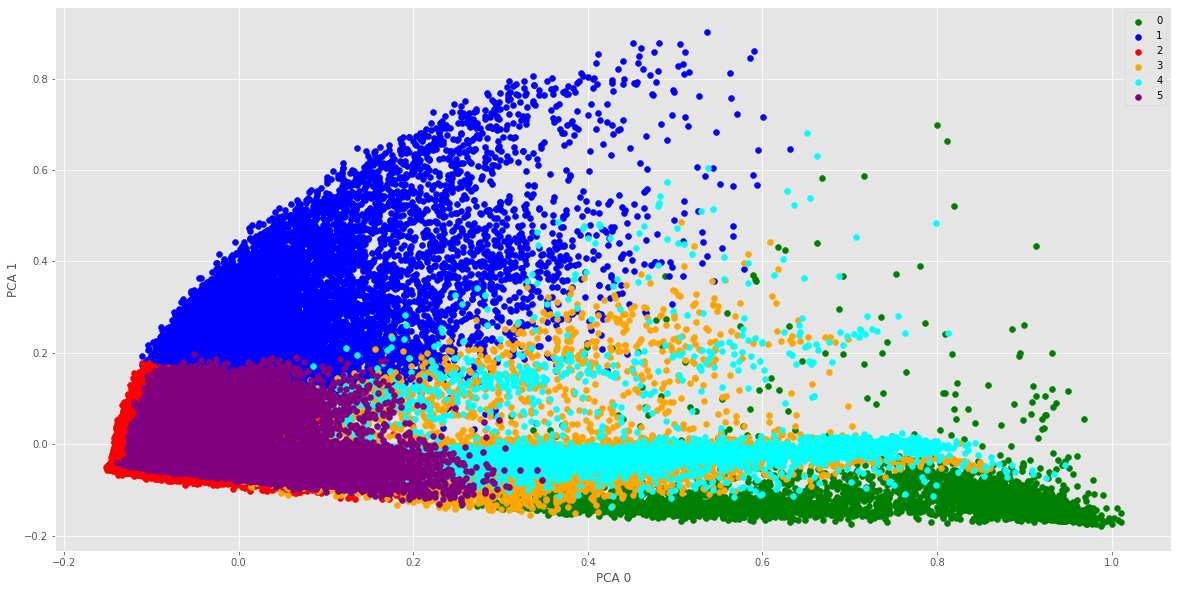

In [53]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

# color map for NUMBER_OF_CLUSTERS we have
cmap = {0: 'green', 1: 'blue', 2: 'red', 3:'orange', 4:'cyan', 5: 'purple'}

# group by clusters and scatter plot every cluster
# with a colour and a label
for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

In [54]:
https://stackoverflow.com/questions/54939424/plotting-vectorized-text-documents-in-matplotlib

SyntaxError: invalid syntax (<ipython-input-54-8eaf10f13c18>, line 1)

In [56]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

# color map for NUMBER_OF_CLUSTERS we have
cmap = {0: 'green', 1: 'blue', 2: 'red', 3:'orange', 4:'cyan', 5: 'purple'}

# group by clusters and scatter plot every cluster
# with a colour and a label
for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

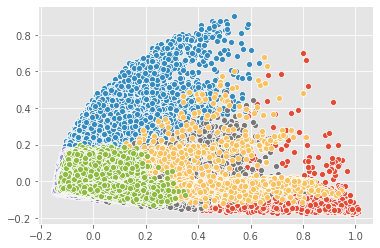

In [60]:
for group in np.unique(clusters):
    ix = np.where(clusters == group)
    sns.scatterplot(scatter_x[ix], scatter_y[ix])

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

# color map for NUMBER_OF_CLUSTERS we have
cmap = {0: 'green', 1: 'blue', 2: 'red', 3:'orange', 4:'cyan', 5: 'purple'}

# group by clusters and scatter plot every cluster
# with a colour and a label
for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()